In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Batch Gradient Desent

In [148]:
df = pd.read_csv('homeprices_banglore.csv')

In [149]:
bedrooms = df['bedrooms']
area = df['area']
y = df['price']

In [150]:
max_area = area.max()
max_price = y.max()
scaled_area = area / max_area
scaled_y = y / max_price

In [151]:
X = pd.concat([scaled_area, bedrooms], axis = 'columns')
X.head()

,area,bedrooms
0,0.285405,2
1,0.702703,4
2,0.389189,3
3,0.411081,3
4,0.324324,2


In [126]:
def batch_gd(X, y, epochs, l_rate = 0.05):
    features = X.shape[1]  # 2: bedrooms, area
    w = np.zeros(shape = features)   # [1, 1] -> 1D vector having 1's   
    b = 0
    n = X.shape[0]  # 20 samples
    cost, epoch_list = [], []

    for _ in range(epochs):
        y_pred = np.dot(X, w) + b

        loss = np.mean(np.square(y - y_pred))

        w_d = -(2/n) * np.dot(X.T, (y - y_pred))
        b_d = -(2/n) * np.sum(y - y_pred)

        w -= (l_rate * w_d)
        b -= (l_rate * b_d)

        if _ % 50 == 0: print(f"Epoch = {_},  w = {w},  b = {b},  loss = {loss}")
        cost.append(loss)
        epoch_list.append(_)

    return w, b, cost, epoch_list


In [127]:
coef, intercept, cost, epoch_list = batch_gd(X, y, 1000)

Epoch = 0,  w = [ 4.8368553 26.5157   ],  b = 7.88535,  loss = 8037.223244999999
Epoch = 50,  w = [15.54055094 28.65319908],  b = -9.292955427977999,  loss = 354.4522204336497
Epoch = 100,  w = [24.7004022  30.30102497],  b = -19.598031930035273,  loss = 275.49118104495085
Epoch = 150,  w = [32.63415796 30.87405003],  b = -25.807460439946052,  loss = 234.00360976121925
Epoch = 200,  w = [39.68591025 30.78836849],  b = -29.43460737437548,  loss = 208.5280847418873
Epoch = 250,  w = [46.07906976 30.30682505],  b = -31.43880422121595,  loss = 190.33748514541477
Epoch = 300,  w = [51.96023287 29.59509438],  b = -32.427925997114755,  loss = 175.8387431209036
Epoch = 350,  w = [57.42702444 28.75725689],  b = -32.78691078407186,  loss = 163.51293804019886
Epoch = 400,  w = [62.5457738  27.85836623],  b = -32.759294308590725,  loss = 152.682951232438
Epoch = 450,  w = [67.36273994 26.93876443],  b = -32.49893603847147,  loss = 143.01678223238522
Epoch = 500,  w = [71.9112437  26.02316135],  b 

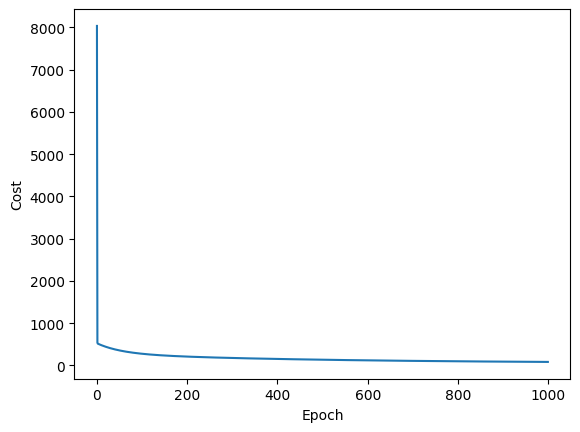

In [128]:
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.plot(epoch_list, cost)

In [129]:
def predict(area, bedrooms, w, b):
    scaled_area = area / max_area
    y_scaled = (w[0] * scaled_area) + (w[1] * bedrooms) + b
    return y_scaled * max_price

In [130]:
predict(2600, 4, coef, intercept)

20295.11947451442

# Stochastic Gradient Descent

In [131]:
import random

In [153]:
def Stochastic_gd(X, y, epochs, l_rate = 0.05):
    features = X.shape[1]  # 2: bedrooms, area
    w = np.zeros(shape = features)   # [1, 1] -> 1D vector having 1's   
    b = 0
    n = X.shape[0]  # 20 samples
    cost, epoch_list = [], []

    for i in range(epochs):
        random_sample = random.randint(0, n-1)
        sample_x = X[random_sample]
        sample_y = y[random_sample]

        y_pred = np.dot(w, sample_x.T) + b

        loss = np.mean(np.square(sample_y - y_pred))

        w_d = -(2/n) * (sample_x.T.dot(sample_y - y_pred))
        b_d = -(2/n) * (sample_y - y_pred)

        w -= (l_rate * w_d)
        b -= (l_rate * b_d)

        if i % 50 == 0: print(f"Epoch = {i},  w = {w},  b = {b},  loss = {loss}")
        cost.append(loss)
        epoch_list.append(i)

    return w, b, cost, epoch_list


In [165]:
scaled_y = np.array(scaled_y)
type(scaled_y)

numpy.ndarray

In [ ]:
coef, intercept, cost, epoch_list = Stochastic_gd(X, scaled_y, 100)

# Mini-Batch Gradient Descent

In [ ]:
def mini_batch_gradient_descent(X, y_true, epochs = 100, batch_size = 5, learning_rate = 0.01):
    
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0] # number of rows in X
    
    if batch_size > total_samples: # In this case mini batch becomes same as batch gradient descent
        batch_size = total_samples
        
    cost_list = []
    epoch_list = []
    
    num_batches = int(total_samples/batch_size)
    
    for i in range(epochs):    
        random_indices = np.random.permutation(total_samples)
        X_tmp = X[random_indices]
        y_tmp = y_true[random_indices]
        
        for j in range(0,total_samples,batch_size):
            Xj = X_tmp[j:j+batch_size]
            yj = y_tmp[j:j+batch_size]
            y_predicted = np.dot(w, Xj.T) + b
            
            w_grad = -(2/len(Xj))*(Xj.T.dot(yj-y_predicted))
            b_grad = -(2/len(Xj))*np.sum(yj-y_predicted)
            
            w = w - learning_rate * w_grad
            b = b - learning_rate * b_grad
                
            cost = np.mean(np.square(yj-y_predicted)) # MSE (Mean Squared Error)
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list


In [ ]:
w, b, cost, cost_list, epoch_list = mini_batch_gradient_descent(
    X,
    scaled_y,
    epochs = 120,
    batch_size = 5
)
w, b, cost

In [ ]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [ ]:
def predict(area,bedrooms,w,b):
    pass

predict(2600,4,w,b)